# MBA em Ciência de Dados
# Técnicas Avançadas de Captura e Tratamento de Dados

### <span style="color:darkred">Módulo I - Dados Estruturados, Não Estruturados e problemas típicos em bases de dados</span>


## <span style="color:darkred">Avaliação com soluções</span>

Moacir Antonelli Ponti

CeMEAI - ICMC/USP São Carlos


---

In [2]:
# carregando a biblioteca necessária
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("./dados/TACTD-01-Base.csv")

### Exercício 1)

Considere a base de dados disponível em `TACTD-01-Base.csv`, e analise os dados faltantes no atributo 'Sex', selecionando as linhas que não sejam 'F' nem 'M'. O tipo de dados faltantes é:
 
 <font color='red'>(a) Completamente aleatório (MCAR)</font><br>
 (b) (Condicionalmente) aleatório (MAR)<br>
 (c) Não aleatório<br>
 (d) Uma mistura de não aleatórios com MAR<br>
 
 <font color='red'>Resposta: (ver abaixo os dados e distribuicoes)</font><br>
 
 <i>TL;DR: Não há justificativa razoável para dizer que a perda da informação Sexo tem relação clara com algum outro *atributo* ou com o próprio *valor da variável*. Considerar MCAR é o mais plausível pois é razoável dizer que os dados existentes (não faltantes) são representativos com relação aos faltantes.
 


 <i>Explicação item a item:
 1. MAR não se aplica pois há poucos dados para afirmar condicionalidade: não seria adequado confiar demais em poucos dados para estabelecer relações com *valores específicos* como "England" do atributo país e o valor "1973" do atributo ano de nascimento.
    * país England: os dados perdidos representam 50% de todos os desse país, mas isso indica realmente algo? Os dois outros perdidos são USA, mas para esse temos muitos outros não faltantes, então há mesmo um padrão ligando País a perda do atributo Sexo? Porque 50% dos faltantes são de England mas para USA isso não se aplicaria?
    * ano 1973: o argumento é parecido, e seria ainda mais difícil considerar uma relação pois precisaríamos condicionar ao ano 1973 e ao país USA, já que para England isso não se aplica (os anos de nascimento são 1986 e 1979 para England).
    
    Assim, para considerar condicionalmente aleatório, não basta achar correlação individual com valores isolados (England, 1973), se isso não tem um embasamento mais forte. Considerar MAR significaria dizer com certeza que a perda está relacionada a valores específicos, e essa conclusão pode estar equivocada.<br>
 
 2. Podemos descartar o caso não aleatório pois não é possível afirmar que a falta dos dados tem a ver com o valor da variável. A distribuicao entre M e F é balanceada na base como um todo, a falta da informação em algumas linhas não tem relação clara com os próprios valores faltantes (M ou F). Apesar desse ser um atributo sensível (Sexo), os dados não indicam de nenhuma forma essa hipótese e, novamente, é razoável dizer que os dados existentes (não faltantes) são representativos com relação aos faltantes.<br>
 
 3. Pelos casos expostos acima, a alternativa "Uma mistura de não aleatórios com MAR" também seria descartada.*<br>
 *Conclusão - o tipo de dados faltantes mais plausível é MCAR.*</i>

In [3]:
df[(df['Sex']!= 'F') & (df['Sex']!= 'M')]

,Name,Sex,Year of Birth,Country of Birth,Religion,City,Profession,Years of Experience
4,Mariann Mulero,NaN,1973,USA,Christian,New Orleans,Nurse,21.0
5,Kathey Kleiman,NaN,1973,USA,Christian,New Orleans,Nurse,18.0
6,Rupert Rollison,NaN,1986,England,Christian,Birmingham,Nurse,5.0
7,Signe Seymore,NaN,1979,England,Christian,Birmingham,Nurse,8.0


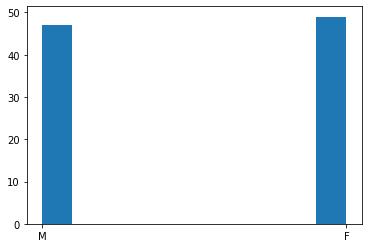

In [4]:
# distribuicao de Sex na base de dados
h = plt.hist(df.loc[df['Sex'].notnull(), 'Sex'])

---

### Exercício 2)


Considere a base de dados disponível em `TACTD-01-Base.csv`, e analise os dados no atributo 'Religion'. Esse atributo possui os seguintes problemas:

 <font color='red'>(a) 5 dados faltantes, sendo desses 2 dados errôneos<br></font>
 (b) 2 dados faltantes devido a omissão do usuário<br>
 (c) 5 dados errôneos, sendo desses 2 outliers<br>
 (d) 5 outliers<br>

<font color='red'>Resposta: </font>*os dados fora do esperado são 'd' '1' e nan, sendo 3 nans. Assim, 3 são faltantes e 2 outros foram digitados erroneamente ou corrompidos.*<br>

In [5]:
df['Religion'].unique()

array(['Christian', 'd', nan, '1'], dtype=object)

In [6]:
df[df['Religion']!='Christian']

,Name,Sex,Year of Birth,Country of Birth,Religion,City,Profession,Years of Experience
9,Leanne Lowy,F,1969,England,d,Birmingham,Nurse,22.0
18,Ricardo Rima,M,1977,Peru,NaN,Arequipa,Nurse,16.0
30,Amelia Caldwell,F,1977,Scotland,NaN,Edinburgh,Nurse,10.0
47,Erica Hudson,F,1980,Brazil,NaN,Santo André,Nurse,10.0
67,Marshall Vargas,M,2013,Scotland,1,Edinburgh,Nurse,NaN


---

### Exercício 3)


Considere a base de dados disponível em `TACTD-01-Base.csv`. Encontre e remova todos os dados errôneos no atributo 'Religion'. Após remover os dados, analise todos as linhas relativas a dados faltantes nesse mesmo atributo. Esses dados faltantes:

 (a) Podem ser tanto (condicionalmente) aleatórios (MAR) quanto completamente aleatórios, portanto é mais seguro considerá-los do tipo MAR<br>
 (b) São seguramente completamente aleatórios (MCAR)<br>
 <font color='red'>(c) Podem ser tanto do tipo completamente aleatório (MCAR) quanto não-aleatórios, portanto é mais seguro considerá-los não aleatórios</font><br>
 (d) São seguramente não aleatórios<br>



 <font color='red'>Resposta: (ver abaixo os dados e distribuicoes)</font><br>
 *Esse caso é diferente da questão 1, pois aqui temos muitos dados, no sentido de que TODOS os valores válidos são possuem um único valor, assim temos como certo que 95 dos 100 são "Christian".*
 *Podemos descartar o caso MAR pois não há qualquer sinal de que há algum outro atributo que esteja correlacionado aos faltantes, o que descarta a opcao "Podem ser tanto (condicionalmente) aleatórios (MAR) quanto completamente aleatórios", restando as opções: não aleatório vs MCAR  ou ainda que não podemos afirmar qual dos dois é o tipo.*<br>
 *1. Os dados válidos possuem um único valor. Isso chama a atencao, pois por ser um atributo sensível (Religião) é possível que os dados faltantes sejam justamente de uma religião não reportada pelos profissionais devido ao valor da religiao.*<br>
 *2. Se considerarmos que os dados são MCAR, assumimos uma premissa bastante forte, permitindo por exemplo o uso de métodos de preenchimento de dados faltantes que, nesse caso, iriam preencher os dados com o único dado existente: 'Christian'*<br>
 *3. Por outro lado, sem mais informacoes (não disponíveis apenas nos dados) não é possível afirmar com certeza que são seguramente não aleatórios*<br>
 *Conclusão - Podem ser tanto do tipo completamente aleatório (MCAR) quanto não-aleatórios, portanto é mais seguro considerá-los não aleatórios, assim não iremos considerar que os dados existentes são representativos para os faltantes.*

In [7]:
df.loc[(df['Religion']!= 'Christian'), 'Religion'] = np.nan
df[df['Religion'].isnull()]

,Name,Sex,Year of Birth,Country of Birth,Religion,City,Profession,Years of Experience
9,Leanne Lowy,F,1969,England,NaN,Birmingham,Nurse,22.0
18,Ricardo Rima,M,1977,Peru,NaN,Arequipa,Nurse,16.0
30,Amelia Caldwell,F,1977,Scotland,NaN,Edinburgh,Nurse,10.0
47,Erica Hudson,F,1980,Brazil,NaN,Santo André,Nurse,10.0
67,Marshall Vargas,M,2013,Scotland,NaN,Edinburgh,Nurse,NaN


[ 0.  0.  0.  0.  0. 95.  0.  0.  0.  0.]


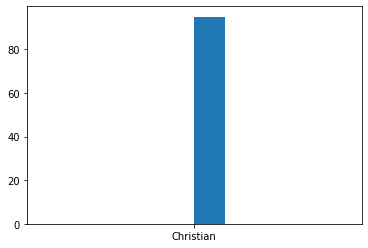

In [9]:
h = plt.hist(df.loc[df['Religion'].notnull(), 'Religion'])
print(h[0])

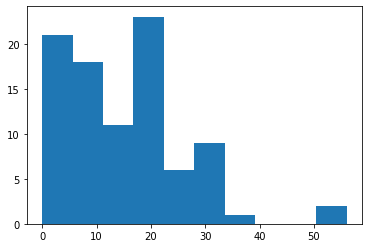

In [21]:
h = plt.hist(df.loc[:, 'Years of Experience'])

---
### Exercício 4)

Dados estruturados, quando comparados aos não-estruturados, são caracterizados por:

(a) possuir formato bem definido para armazenamento, sendo inviável executar validação dos dados<br>
(b) possibilitar maior liberdade/flexibilidade na coleta dos dados, sendo ideais para coleta com baixo controle<br>
<font color='red'>(c) possuir campos e atributos que permitam endereçar os dados, e maior custo de manutenção<br></font>
(d) estar armazenado em formato binário ou de texto livre, e não permitir controle de versões


---

### Exercício 5)

Considere a base de dados disponível em `TACTD-01-Base.csv`, e analise os dados no atributo 'Years of experience' por meio do gráfico de caixa e depois visualizando as linhas contendo outliers mostrados no gráfico de caixa.

O atributo possui:

(a) 1 outlier global, e 1 outlier contextual<br>
(b) nenhum outlier, pois todos os dados são plausíveis<br>
(c) 2 outliers contextuais, sendo um deles também um outlier global<br>
<font color='red'>(d) 2 outliers globais, sendo um deles também um outlier contextual<br></font>

 <font color='red'>Resposta: (ver abaixo os dados e distribuicoes)</font><br>
 *Analisando o boxplot, vemos que os outliers estão acima de 40 anos de experiencia. Selecionando-os, notamos que são efetivamente pontos aberrantes, com 56 anos de experiencia. Sendo que um deles pode fazer sentido pois uma pessoa nascida em 1930, que teria hoje cerca de 90 anos, pode realmente ter 56 anos de experiência, já o segundo nascido em 1988 teria apenas 30 anos, sendo impossível ter 56 anos de experiência e portanto é também um outlier contextual*

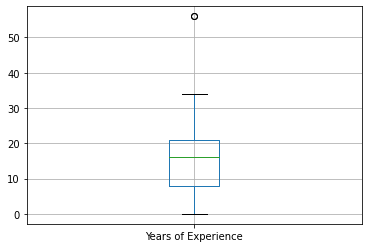

In [6]:
df.boxplot(['Years of Experience'])

In [11]:
df[df['Years of Experience']>40]

,Name,Sex,Year of Birth,Country of Birth,Religion,City,Profession,Years of Experience
1,Ivo Izidro,M,1988,Mexico,Christian,Acapulco,Nurse,56.0
22,Ariel Almada,F,1930,Portugal,Christian,Lisbon,Nurse,56.0


## Exercício 6)

Gere o gráfico de caixa do atributo 'Year of Birth' e depois selecione e imprima na tela todas as linhas em que o atributo 'Year of Birth' possui valores fora das barras de mínimo e máximo do gráfico de caixa.

Como interpretar as linhas retornadas e quais ações são mais indicadas, em termos de manter ou remover os dados supeitos?

(a) a linha 22 e a linha 67 possuem outliers e dados errôneos, todos esses valores devem ser removidos.<br>
<font color='red'>(b) a linha 22 possui valores outliers, mas são plausíveis e podem ser mantidos; a linha 67 possui outliers e dados errôneos, os quais devem ser removidos<br></font>
(c) a linha 22 possui outliers e dados errôneos, os quais devem ser removidos; a linha 67 possui outliers, mas são plausíveis e podem ser mantidos<br>
(d) a linha 67 e a linha 22 possuem valores outliers, mas não é recomendado removê-los.<br>

 <font color='red'>Resposta: (ver abaixo os dados e distribuicoes)</font><br>
 *A linha 22 já foi analisada na questão anterior, possui um valor outlier (1930), mas plausível, já a linha 67 possui ano de nascimento 2009 portanto essa pessoa teria no máximo 11 anos em 2020 sendo improvável que tenha formacao de "Enfermeiro(a)", o que é reforcado pelos Anos de Experiencia não reportados. Assim, é mais seguro remover essa linha, ou ao menos os atributos Year of Birth e Religion se considerarmos que podem ser dados erroneos (imputados incorretamente ou corrompidos).*


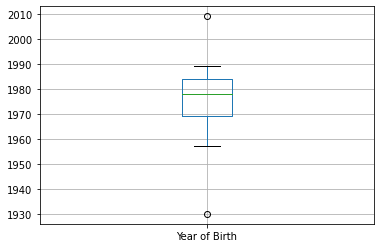

In [20]:
df.boxplot(['Year of Birth'])

In [22]:
df[(df['Year of Birth']>1990) | (df['Year of Birth']<1940)]

,Name,Sex,Year of Birth,Country of Birth,Religion,City,Profession,Years of Experience
22,Ariel Almada,F,1930,Portugal,Christian,Lisbon,Nurse,56.0
67,Marshall Vargas,M,2009,Scotland,1,Edinburgh,Nurse,NaN
